In [1]:
import numpy as np
from math import cos, sin, pi, radians, sqrt
from scipy.special import fresnel
import matplotlib.pyplot as plt



In [2]:

def spiral_interp_centre(distance, x, y, hdg, length, curvEnd):
    '''Interpolate for a spiral centred on the origin'''
    # s doesn't seem to be needed...
    theta = hdg                    # Angle of the start of the curve
    Ltot = length                  # Length of curve
    Rend = 1 / curvEnd             # Radius of curvature at end of spiral

    # Rescale, compute and unscale
    a = 1 / sqrt(2 * Ltot * Rend)  # Scale factor
    distance_scaled = distance * a # Distance along normalised spiral
    deltay_scaled, deltax_scaled = fresnel(distance_scaled)
    deltax = deltax_scaled / a
    deltay = deltay_scaled / a

    # deltax and deltay give coordinates for theta=0
    deltax_rot = deltax * cos(theta) - deltay * sin(theta)
    deltay_rot = deltax * sin(theta) + deltay * cos(theta)

    # Spiral is relative to the starting coordinates
    xcoord = x + deltax_rot
    ycoord = y + deltay_rot

    return xcoord, ycoord


[-99.81226005136305, -98.82145505672592, -97.83028649501173, -96.83876522984649, -95.84690190834135, -94.854706963125, -93.86219061438499, -92.86936287191772, -91.87623353718664, -90.88281220538902, -89.88910826753016, -88.89513091250568, -87.90088912919087, -86.90639170853734, -85.91164724567673, -84.91666414203092, -83.92145060742887, -82.92601466222943, -81.9303641394507, -80.93450668690485, -79.93844976933852, -78.94220067057894, -77.9457664956851, -76.94915417310405, -75.95237045683174, -74.95542192857927, -73.95831499994276, -72.96105591457811, -71.96365075037986, -70.96610542166384, -69.96842568135385, -68.97061712317189, -67.97268518383201, -66.97463514523753, -65.97647213668147, -64.97820113705009, -63.979826977029475, -62.981354341314784, -61.98278777082243, -60.98413166490466, -59.98539028356674, -58.98656774968639, -57.987668051235545, -56.988695043504215, -55.98965245132633, -54.99054387130759, -53.99137277405513, -52.99214250640883, -51.99285629367446, -50.99351724185811,

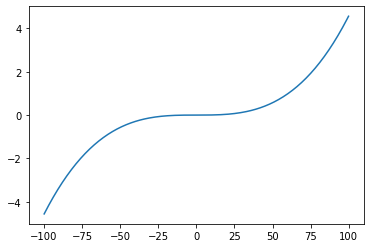

In [4]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# This version
startX=0
startY=0
curvStart = radians(0) # 0 when coming out of a straight line
curvEnd = radians(0.01) # non 0 when going into an arc
length = 10
xs = []
ys = []
for n in range(-100, 100+1):
    x, y = spiral_interp_centre(n, startX, startY, curvStart, length, curvEnd)
    xs.append(x)
    ys.append(y)
ax.plot(xs, ys)

print(xs)
